In [ ]:
# Calculate AUROC and AUPR for Chymera screen scored using 6 scoring methods.
# Thompson Screen

print("Running Thompson Analysis")
print(f"Apply Filter?: {apply_filter}")

if apply_filter.lower() == "true":
    filtered = "/Filtered"
    print("Compiling results with filtered pairs")
else:
    filtered = ""

In [9]:
# Uncomment the command below if you run this script separately. 

#%run AnalysisFunctions.ipynb
#filtered = ""

In [10]:
# Load calculated zdLFC Scores
# Doesnt matter if filtered or not, as zdLFC does not drop any data

zdLFC = pd.read_csv("../zdLFC Scripts/zdLFC Output/Thompson_zdLFC.csv")
zdLFC = zdLFC.rename(columns={zdLFC.columns[0]: 'GENE'})

zdLFC = zdLFC.set_index('GENE')
#zdLFC
zdLFC = reindex_alphbetically(zdLFC)
zdLFC = -1 * zdLFC
zdLFC.drop(columns=['A375_D14', 'RPE_D14', 'MEWO_D14'], inplace = True )
zdLFC = zdLFC.rename(columns={'A375_D28':'A375', 'RPE_D28': 'RPE', 'MEWO_D28': 'MEWO'})


In [11]:
orthrus = pd.read_csv("../Orthrus Scripts/OrthrusOutput" + filtered + "/thompson_orthrus.tsv", sep='\t') 
orthrus['GENE'] = orthrus['gene1'] + "_" + orthrus['gene2']
orthrus = orthrus.filter(like='differential', axis=1) \
                    .join(orthrus.filter(items=['GENE']))

orthrus = orthrus.rename(columns={'differential_combn_vs_single_A375_D14': 'A375_D14', 
                                  'differential_combn_vs_single_MEWO_D14': 'MEWO_D14', 
                                  'differential_combn_vs_single_RPE_D14': 'RPE_D14',
                                  'differential_combn_vs_single_A375_D28': 'A375_D28', 
                                  'differential_combn_vs_single_MEWO_D28': 'MEWO_D28', 
                                  'differential_combn_vs_single_RPE_D28': 'RPE_D28'})
orthrus = orthrus.set_index('GENE')
orthrus = reindex_alphbetically(orthrus)
orthrus = orthrus * -1
orthrus
#orthrus.drop(columns=['A375_D14', 'RPE_D14', 'MEWO_D14'], inplace = True )
orthrus = orthrus.rename(columns={'A375_D28':'A375', 'RPE_D28': 'RPE', 'MEWO_D28': 'MEWO'})

orthrus


,A375,MEWO,RPE
gene_pair,,,
AARS_AARS2,0.062167,-0.020865,0.473955
ABCB6_ABCB7,-0.008320,0.006816,0.138905
ABCF1_ABCF3,-0.300341,-0.138351,-0.053651
ABHD12_ABHD12B,-0.101377,0.006144,-0.103643
ABL1_EGFR,-0.039432,0.083201,0.304800
...,...,...,...
CENPF_ZSWIM3,0.106615,-0.146066,0.136879
WDHD1_ZSWIM3,0.287604,0.137473,-0.258187
EXO1_ZYX,0.122318,0.219717,-0.367777


In [12]:
# Parrish doesnt drop any pairs for this screen 
parrish = pd.read_csv("../Parrish Score Scripts/ParrishOutput/Thompson_parrish.csv") 
parrish.set_index('paralog_pair', inplace = True)
parrish  = reindex_alphbetically(parrish )#

parrish = parrish * -1


In [13]:
Gemini_Strong = pd.read_csv('../Gemini Scripts/GeminiOutput' + filtered + '/Gemini_Thompson_Strong.csv')
Gemini_Strong.rename({ "Unnamed: 0": "gene_pair"}, inplace = True, axis = 1)
Gemini_Strong['gene_pair'] = Gemini_Strong['gene_pair'].replace(':', '_', regex=True)
Gemini_Strong.set_index('gene_pair', inplace = True)
Gemini_Strong  = reindex_alphbetically(Gemini_Strong )

display(Gemini_Strong)



Gemini_Sensitive = pd.read_csv('../Gemini Scripts/GeminiOutput' + filtered + '/Gemini_Thompson_Sensitive.csv')
Gemini_Sensitive.rename({ "Unnamed: 0": "gene_pair"}, inplace = True, axis = 1)
Gemini_Sensitive['gene_pair'] = Gemini_Sensitive['gene_pair'].replace(':', '_', regex=True)
Gemini_Sensitive.set_index('gene_pair', inplace = True)
Gemini_Sensitive  = reindex_alphbetically(Gemini_Sensitive )

#Gemini_Sensitive 

,A375_D14,MEWO_D14,RPE_D14,A375_D28,MEWO_D28,RPE_D28
gene_pair,,,,,,
AARS_AARS2,-0.393673,-0.649831,0.070619,0.803847,-0.370211,1.009578
ABCB6_ABCB7,0.297071,0.010888,0.314090,0.350468,0.175052,0.803622
ABCF1_ABCF3,-0.073046,-0.122871,-0.068683,-0.004914,-0.082484,0.167401
ABHD12_ABHD12B,0.123403,-0.048540,0.792131,0.038744,0.014771,0.813341
ABL1_EGFR,-0.006902,0.056022,0.304965,-0.095908,0.078144,0.607508
...,...,...,...,...,...,...
CENPF_ZSWIM3,0.194554,-0.026302,0.634907,0.049692,-0.001758,0.697917
WDHD1_ZSWIM3,1.182859,0.519947,0.577349,0.983865,1.135808,-0.754256
EXO1_ZYX,0.344903,-0.051679,0.579195,0.751003,0.147853,0.587180


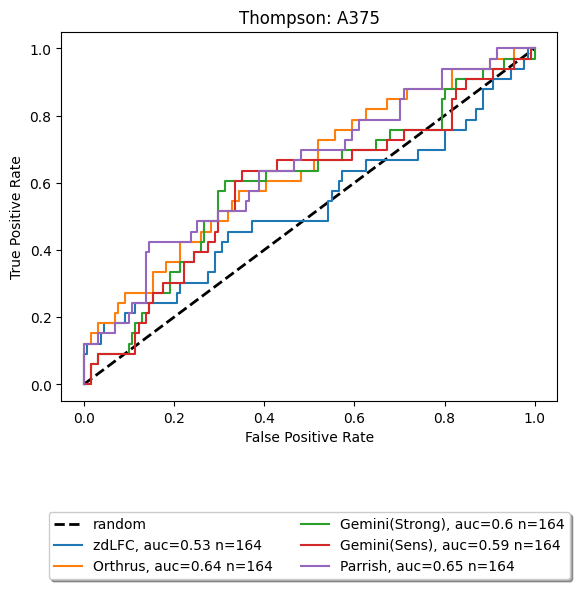

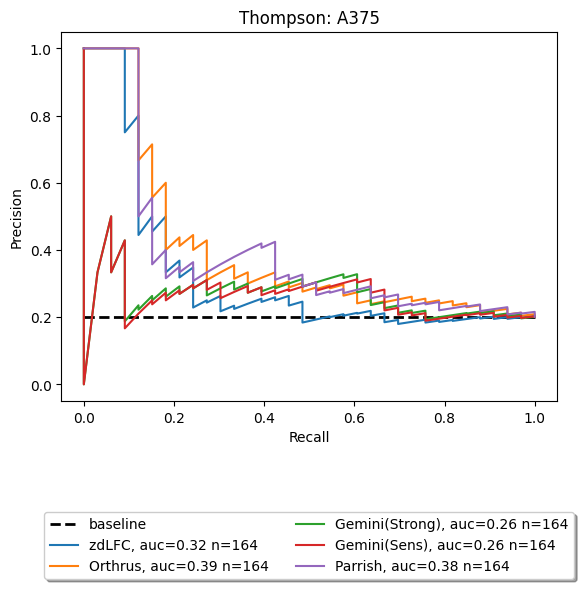

In [14]:
# A375 Cell line
Thompson_A375 = pd.concat([zdLFC['A375'],
                       orthrus['A375'],
                               Gemini_Strong['A375_D28'],
                           Gemini_Sensitive['A375_D28'],
                           parrish['GI_score_A375']
                      ], axis = 1, keys=scores)


results_Thompson_A375 = Cell_Line_Analysis(Thompson_A375, 'A375', 'Thompson', 
                   scores, ground_truth_depmap_hit)


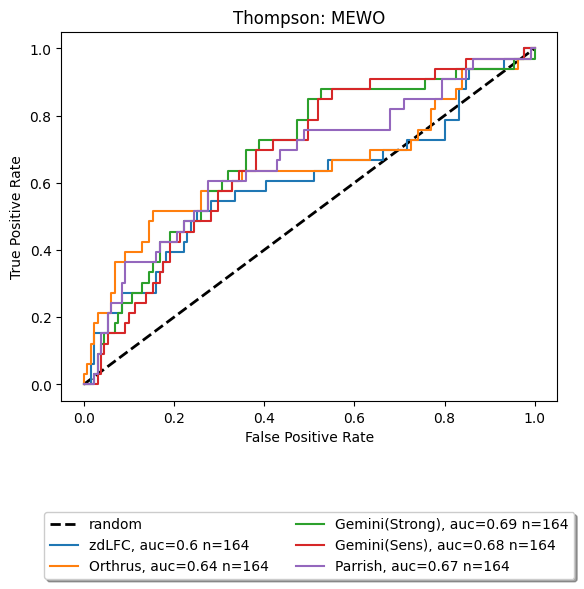

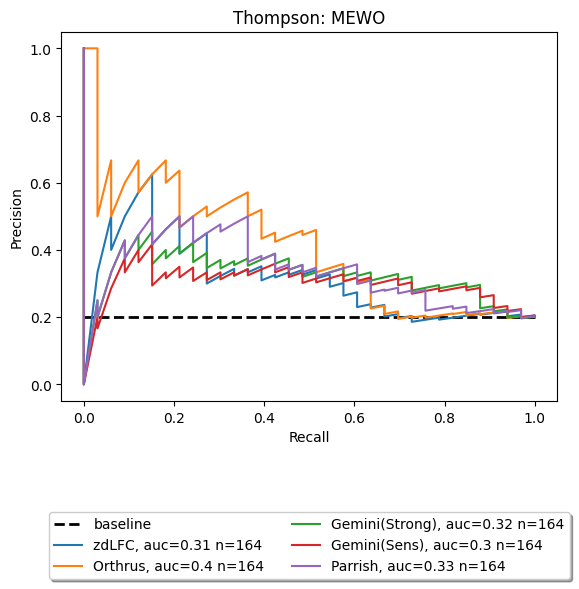

In [15]:
#MEWO

Thompson_MEWO = pd.concat([zdLFC['MEWO'],
                       orthrus['MEWO'],
                               Gemini_Strong['MEWO_D28'],
                           Gemini_Sensitive['MEWO_D28'],
                           parrish['GI_score_MEWO']
                      ], axis = 1, keys=scores)

results_Thompson_MEWO = Cell_Line_Analysis(Thompson_MEWO, 'MEWO', 'Thompson', 
                   scores, ground_truth_depmap_hit)

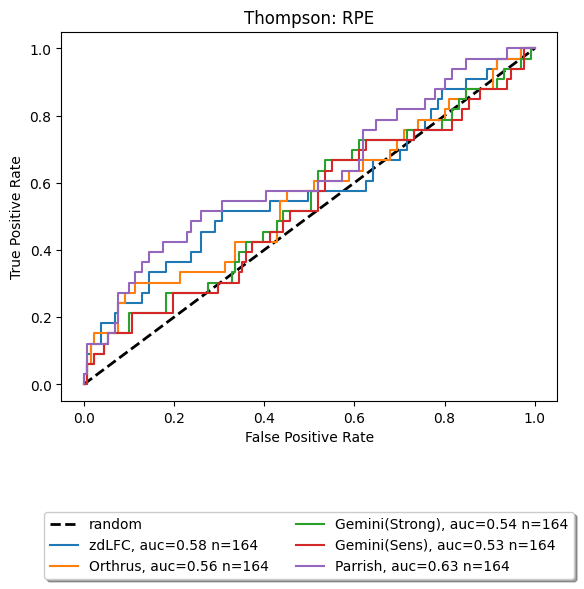

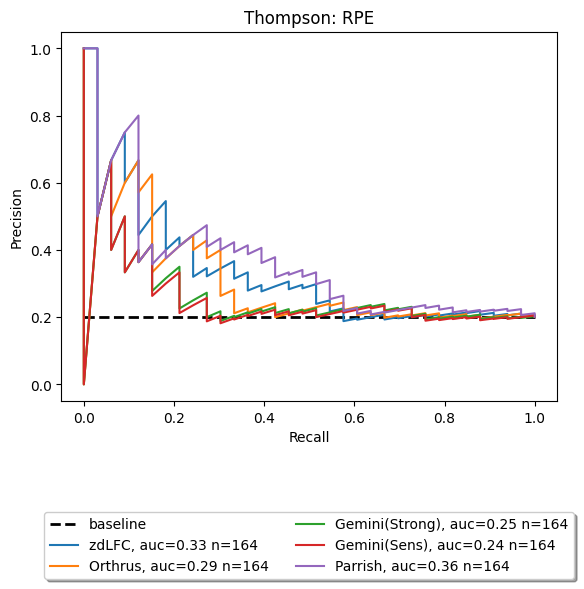

In [16]:
# RPE 
Thompson_RPE = pd.concat([
    zdLFC['RPE'],
    orthrus['RPE'],
    Gemini_Strong['RPE_D28'],
    Gemini_Sensitive['RPE_D28'],
    parrish['GI_score_RPE']
                      ], axis = 1, keys=scores)



results_Thompson_RPE = Cell_Line_Analysis(Thompson_RPE, 'RPE', 'Thompson', 
                   scores, ground_truth_depmap_hit)

In [17]:

full_list = [results_Thompson_A375, results_Thompson_MEWO, results_Thompson_RPE]

roc, pr = ConvertResultsToDF(full_list)


In [18]:

## Write results to a file
roc.to_csv("Output" + filtered + "/Thompson_ROC_DepMapHits.csv", index=False)
pr.to_csv("Output" + filtered+ "/Thompson_PR_DepMapHits.csv", index=False)


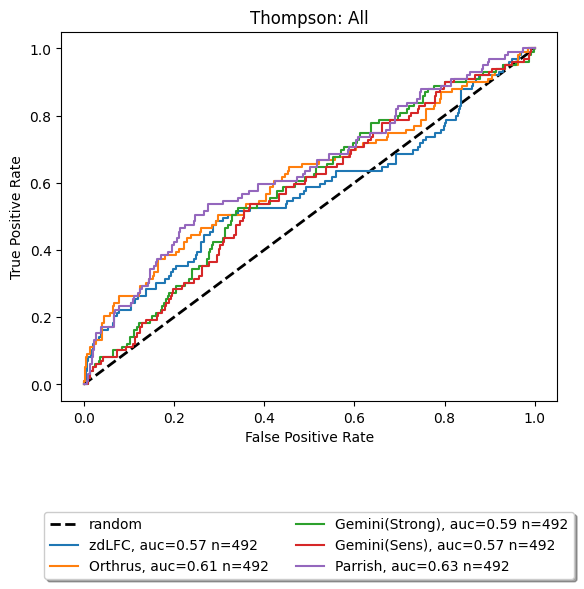

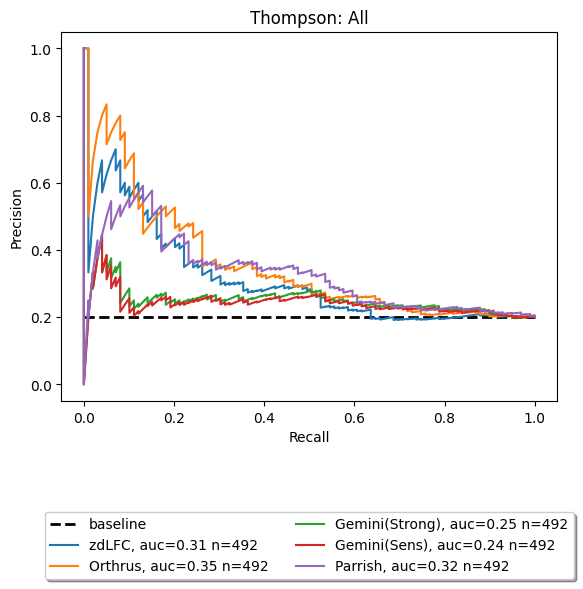

In [19]:
thompson_all = pd.concat([Thompson_A375, Thompson_MEWO, Thompson_RPE])
thompson_all
results_thompson_all = Cell_Line_Analysis(thompson_all, 'All', 'Thompson', 
                  scores,ground_truth_depmap_hit)
roc_all, pr_all = ConvertResultsToDF([results_thompson_all] )


In [20]:
## Write results to a file
roc_all.to_csv("Output"+ filtered + "/Thompson_All_ROC_DepMapHits.csv", index=False)
pr_all.to_csv("Output" + filtered + "/Thompson_All_PR_DepMapHits.csv", index=False)


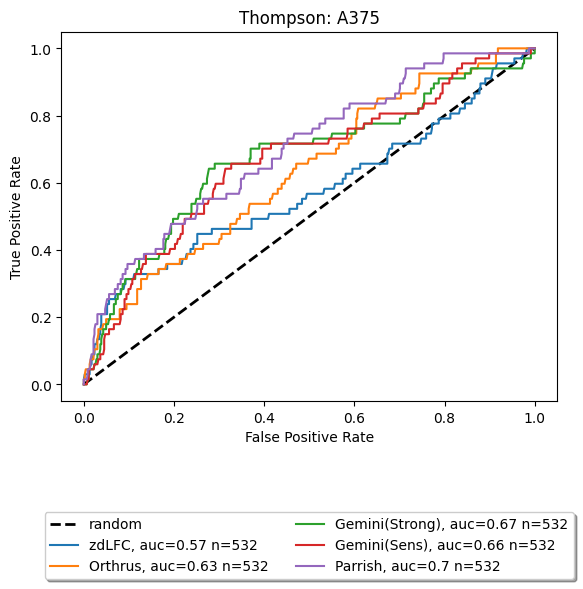

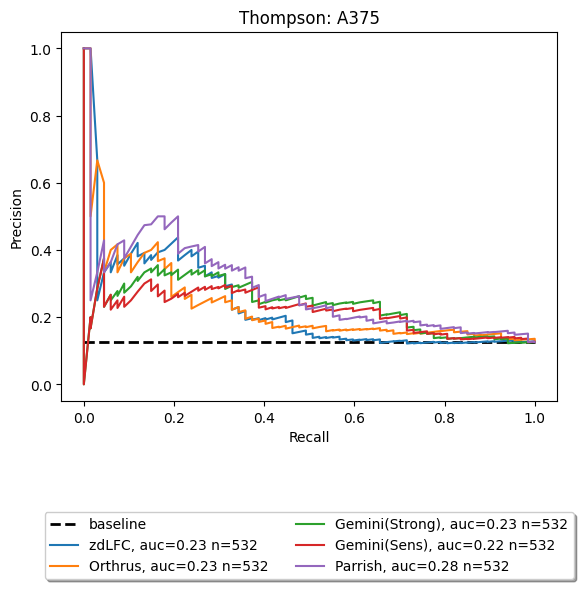

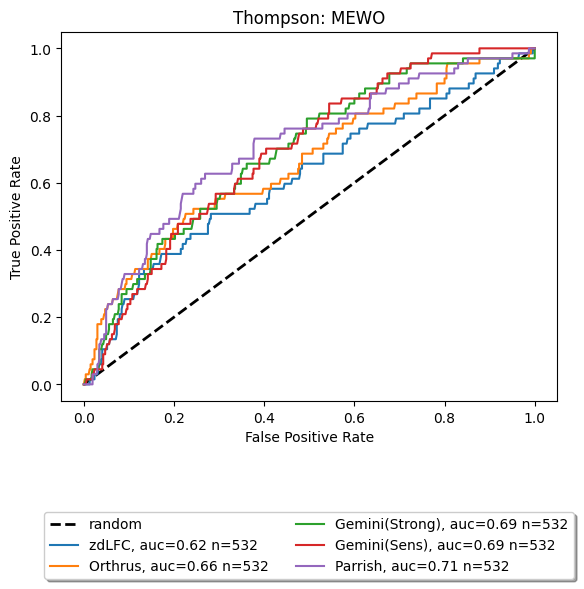

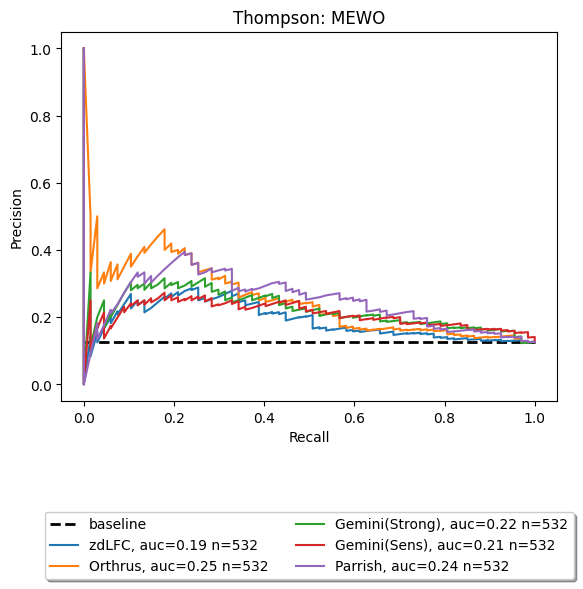

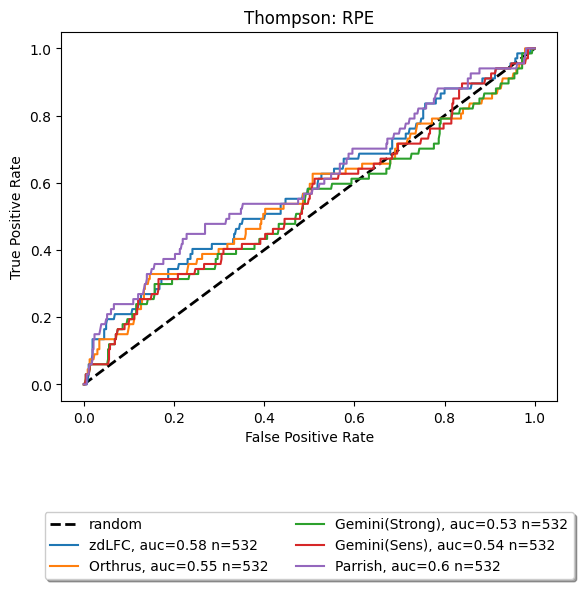

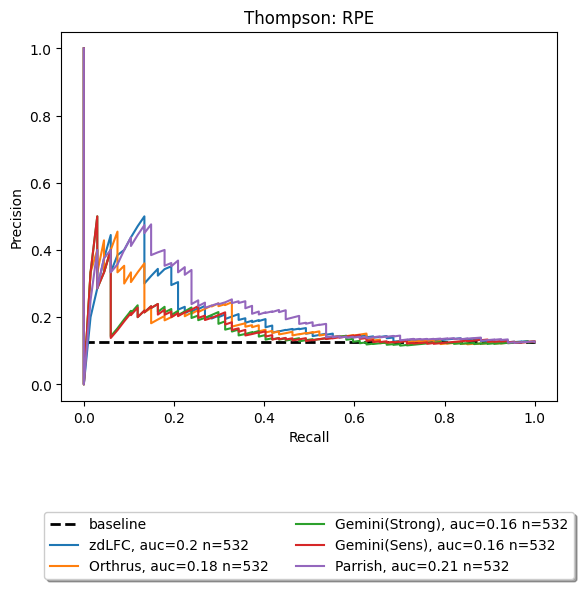

In [21]:
## Change the validation set  to Korelefe

results_Thompson_A375_Koferle =Cell_Line_Analysis(Thompson_A375, 'A375', 'Thompson', scores, Koferle)
results_Thompson_MEWO_Koferle =Cell_Line_Analysis(Thompson_MEWO, 'MEWO', 'Thompson', scores, Koferle)
results_Thompson_RPE_Koferle =Cell_Line_Analysis(Thompson_RPE, 'RPE', 'Thompson', scores, Koferle)


full_list_Koferle = [results_Thompson_A375_Koferle, results_Thompson_MEWO_Koferle,results_Thompson_RPE_Koferle]

roc_Koferle, pr_Koferle = ConvertResultsToDF(full_list_Koferle)

## Write results to a file
roc_Koferle.to_csv("Output"+ filtered + "/Thompson_ROC_Koferle.csv", index=False)
pr_Koferle.to_csv("Output" + filtered + "/Thompson_PR_Koferle.csv", index=False)


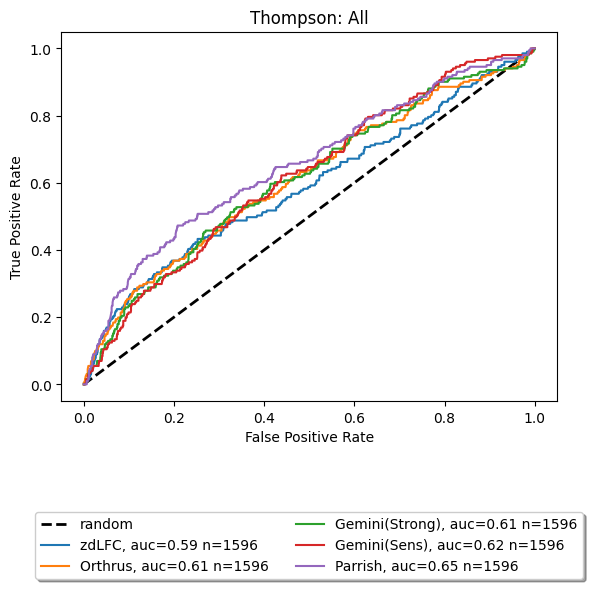

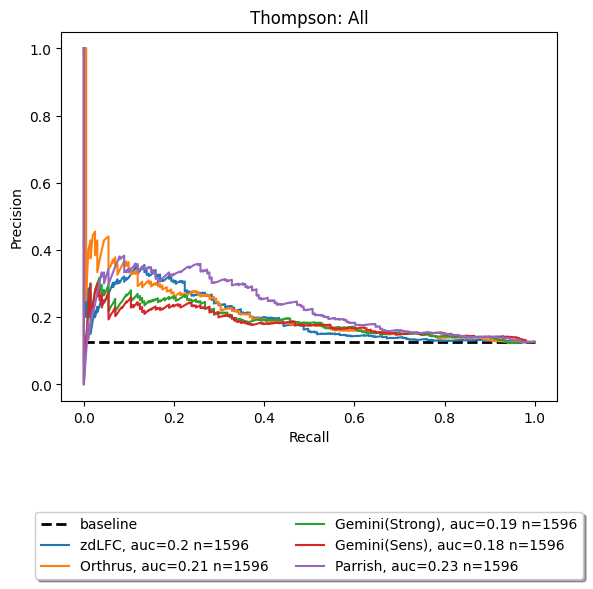

In [22]:
results_thompson_all_Koferle = Cell_Line_Analysis(thompson_all, 'All', 'Thompson', scores,Koferle)
roc_all_Koferle, pr_all_Koferle = ConvertResultsToDF([results_thompson_all_Koferle] )
## Write results to a file
roc_all_Koferle.to_csv("Output" + filtered + "/Thompson_All_ROC_Koferle.csv", index=False)
pr_all_Koferle.to_csv("Output" + filtered + "/Thompson_All_PR_Koferle.csv", index=False)


In [23]:
#thompson_all

output_path = "Output" + filtered + "\Comparison"
thompson_all.corr(method = "spearman").to_csv(output_path + "\Thompson_Correlations.csv")

Thompson_A375_J = jaccard_similarity(Thompson_A375, 0.95)
Thompson_A375_J.to_csv(output_path + "\Thompson_A375_Jaccard.csv")

Thompson_MEWO_J = jaccard_similarity(Thompson_MEWO, 0.95)
Thompson_MEWO_J.to_csv(output_path + "\Thompson_MEWO_Jaccard.csv")


Thompson_RPE_J = jaccard_similarity(Thompson_RPE, 0.95)
Thompson_RPE_J.to_csv(output_path + "\Thompson_RPE_Jaccard.csv")



Thompson_Jaccard = (Thompson_A375_J + Thompson_MEWO_J + Thompson_RPE_J) / 3
Thompson_Jaccard.to_csv(output_path + "\Thompson_Jaccard.csv")